# Mini Proyecto 2 - Aprendizaje Supervisado
## Importado de Librerias

In [189]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams.update({'font.size': 14})

### Solución Cerrada de Regresión Lineal
- Utilizando numpy (np.random) genere 100 datos que se encuentren entre 0
y 3. Este vector representará su variable independiente.
- Con la misma librería genere los 100 datos de la variable dependiente de la
siguiente forma: 
$$ y = 5 +2x + u(-2,5) $$

In [190]:
def formula(x):
  return  5+2*x+np.random.uniform(-2,5)

vars_indep = 3*np.random.rand(100)
vars_depend = np.array([formula(x) for x in vars_indep])

### Visualización de Datos
- Por medio de matplotlib (o seaborn) genere un gráfico de dispersión (scatter
plot) entre la variable dependiente y la variable independiente.

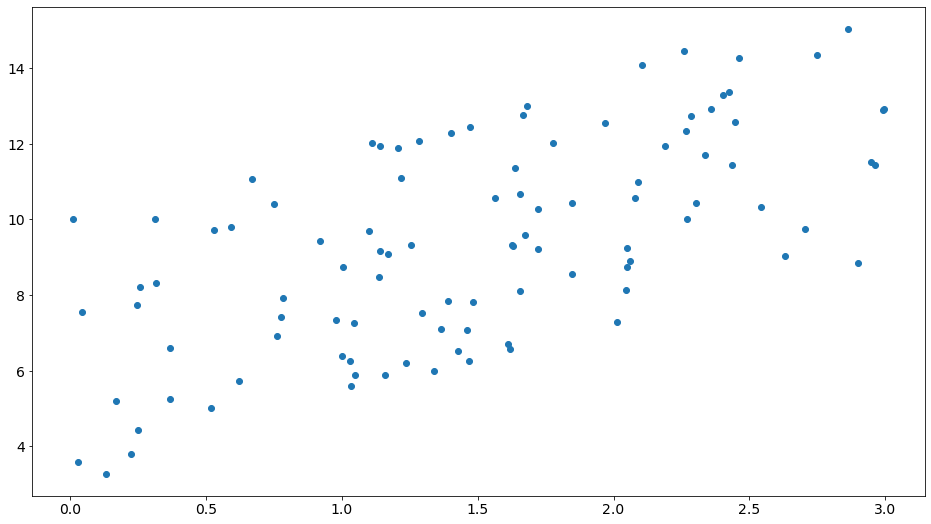

In [191]:
plt.scatter(vars_indep, vars_depend)
plt.show()

### Ajuste de Regresión Lineal
- Se encontrarán los parametros para la ecuacion se la siguiente forma: $\large{y = \beta_0 + \beta_1x_i}$ 


#### Método A: Paso a paso
- Utilizando **$$[\beta_0,\beta_1] = (X^{\text{T}}X)^{-1}X^{\text{T}}Y$$**

In [192]:
def lin_mf_fit(x_vals,y):
  x_vals = np.array(x_vals)
  y = np.array(y)
  x_vals.shape
  x_array = np.concatenate((np.ones(x_vals.shape),x_vals)).reshape(2,-1)
  x_transpose = np.transpose(x_array)
  x_dot_x = np.dot(x_array,x_transpose)
  x_inv = np.linalg.inv(x_dot_x)
  x_dot_y = np.dot(y,x_transpose)
  return np.dot(x_inv,x_dot_y)

def lin_mf_pred(x_vals,coefficients):
  return np.dot(coefficients[1], x_vals) + coefficients[0]

y_pred = lin_mf_pred(vars_indep, lin_mf_fit(vars_indep, vars_depend))

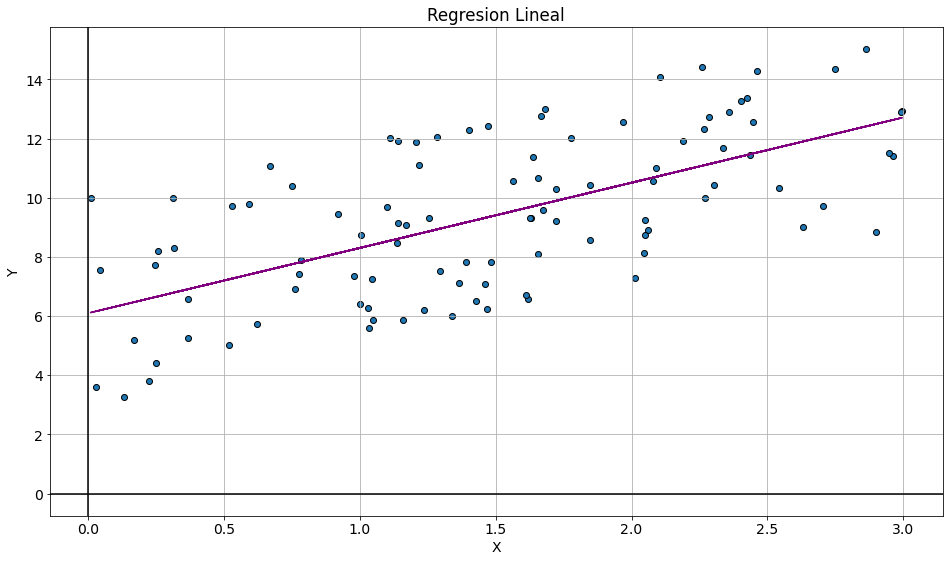

In [193]:
plt.scatter(vars_indep, vars_depend, edgecolors='black')
plt.plot(vars_indep, y_pred, color='purple')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xlabel('X');plt.ylabel('Y');
plt.title('Regresion Lineal')
plt.grid()

#### Método B: Mediante *np.linalg*

In [194]:
x = vars_indep.reshape(100, 1)
X = np.append(x, np.ones((100, 1)), axis=1)
y = vars_depend.reshape(100, 1)
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_pred2 = theta[0]*x + theta[1]

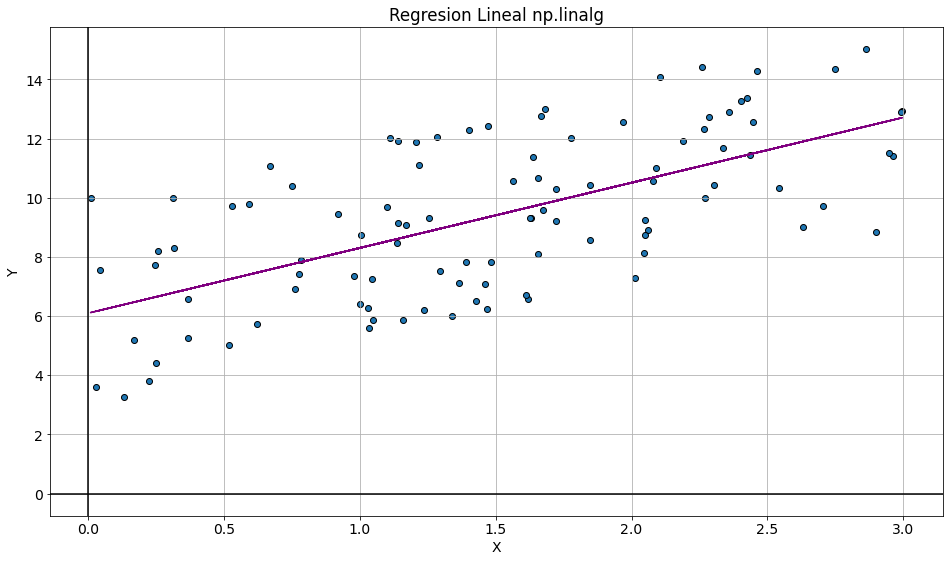

In [195]:
plt.scatter(vars_indep, vars_depend, edgecolors='black')
plt.plot(vars_indep, y_pred2, color='purple')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xlabel('X');plt.ylabel('Y');
plt.title('Regresion Lineal np.linalg')
plt.grid()

### Regresión Polinomial
#### Carga de Base
- Leer el archivo `ts.csv`
- Tomar una muestra de 200 elementos

In [196]:
data = pd.read_csv('ts.csv')
data = data.head(200)

#### Visualizar los datos

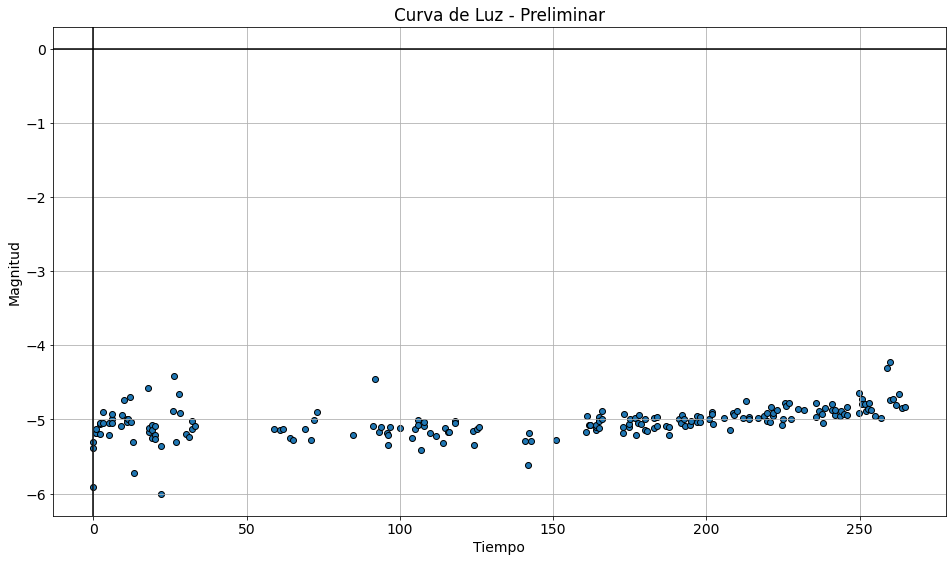

In [197]:
plt.scatter(data['tiempo'], data['magnitud'], edgecolors='black')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xlabel('Tiempo');plt.ylabel('Magnitud');
plt.title('Curva de Luz - Preliminar')
plt.grid()

#### Ajustes de Regresión Polinomial
Para esta primer ajuste se utilizará un ajuste polinomial mediante un polinomio de grado 3, luego, se realizaran los calculos usando un polinomio de grado 6, 9 y 10.

In [198]:
def poly_reg_fit(x,y, degree):
  x = np.array(x)
  y = np.array(y)
  x_array = np.concatenate((np.ones(x.shape), *[x**i for i in range(1, degree+1)])).reshape(degree+1,-1)
  x_transpose = np.transpose(x_array)
  x_dot_x = np.dot(x_array,x_transpose)
  x_inv = np.linalg.inv(x_dot_x)
  x_dot_y = np.dot(y,x_transpose)
  intercept_beta = np.dot(x_inv,x_dot_y)
  return intercept_beta

def poly_pred(x, coefficients, degree):
  ac = coefficients[0]
  for i in range(1, degree+1):
    ac += np.dot(coefficients[i], x**i)
  return ac

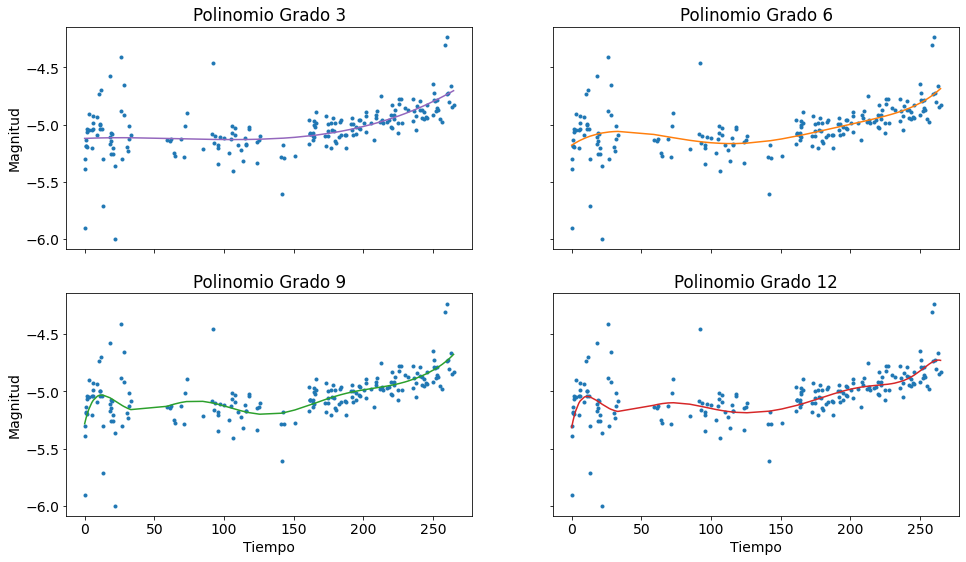

In [230]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(data['tiempo'], data['magnitud'], '.')
axs[0, 0].plot(data['tiempo'], poly_pred(data['tiempo'], poly_reg_fit(data['tiempo'],data['magnitud'], 3), 3), 'tab:purple')
axs[0, 0].set_title('Polinomio Grado 3')
axs[0, 1].plot(data['tiempo'], data['magnitud'], '.')
axs[0, 1].plot(data['tiempo'], poly_pred(data['tiempo'], poly_reg_fit(data['tiempo'],data['magnitud'], 6), 6), 'tab:orange')
axs[0, 1].set_title('Polinomio Grado 6')
axs[1, 0].plot(data['tiempo'], data['magnitud'], '.')
axs[1, 0].plot(data['tiempo'], poly_pred(data['tiempo'], poly_reg_fit(data['tiempo'],data['magnitud'], 9), 9), 'tab:green')
axs[1, 0].set_title('Polinomio Grado 9')
axs[1, 1].plot(data['tiempo'], data['magnitud'], '.')
axs[1, 1].plot(data['tiempo'], poly_pred(data['tiempo'], poly_reg_fit(data['tiempo'],data['magnitud'], 10), 10), 'tab:red')
axs[1, 1].set_title('Polinomio Grado 12')
for ax in axs.flat:
  ax.set(xlabel='Tiempo', ylabel='Magnitud')
for ax in axs.flat:
  ax.label_outer()

Se desprende que a medida que el grado del polinomio sube, la curva, se va ajustando cada vez mas a la forma en la que se distribuyen las muestras tomadas. Cabe descatar que no es conveniente usar un grado muy alto ya que el modelo puede empezar a integrar patrones de los datos.

### Regresión con Penalización


/home/nico/Desktop/Diplomado-UC/Modulo 3 - Machine Learning/MP2/MP2/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/nico/Desktop/Diplomado-UC/Modulo 3 - Machine Learning/MP2/MP2/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, 

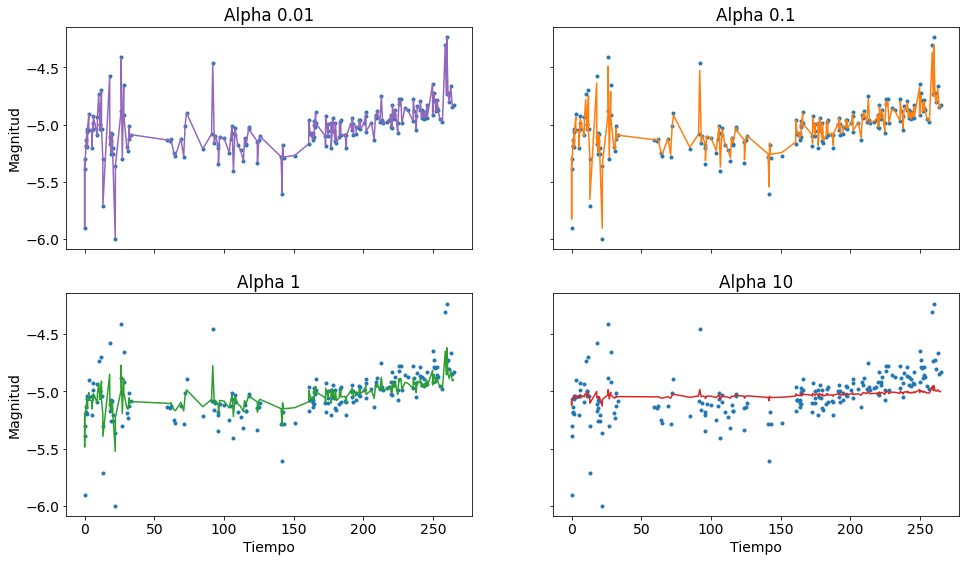

In [229]:
def ridge(data, alpha):
  ridgereg = Ridge(alpha=alpha, normalize=True)
  ridgereg.fit(data, data['magnitud'])
  return ridgereg.predict(data)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(data['tiempo'], data['magnitud'], '.')
axs[0, 0].plot(data['tiempo'], ridge(data, 0.01), 'tab:purple')
axs[0, 0].set_title('Alpha 0.01')
axs[0, 1].plot(data['tiempo'], data['magnitud'], '.')
axs[0, 1].plot(data['tiempo'], ridge(data, 0.1), 'tab:orange')
axs[0, 1].set_title('Alpha 0.1')
axs[1, 0].plot(data['tiempo'], data['magnitud'], '.')
axs[1, 0].plot(data['tiempo'], ridge(data, 1), 'tab:green')
axs[1, 0].set_title('Alpha 1')
axs[1, 1].plot(data['tiempo'], data['magnitud'], '.')
axs[1, 1].plot(data['tiempo'], ridge(data, 10), 'tab:red')
axs[1, 1].set_title('Alpha 10')
for ax in axs.flat:
    ax.set(xlabel='Tiempo', ylabel='Magnitud')
for ax in axs.flat:
    ax.label_outer()

/home/nico/Desktop/Diplomado-UC/Modulo 3 - Machine Learning/MP2/MP2/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/nico/Desktop/Diplomado-UC/Modulo 3 - Machine Learning/MP2/MP2/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale t

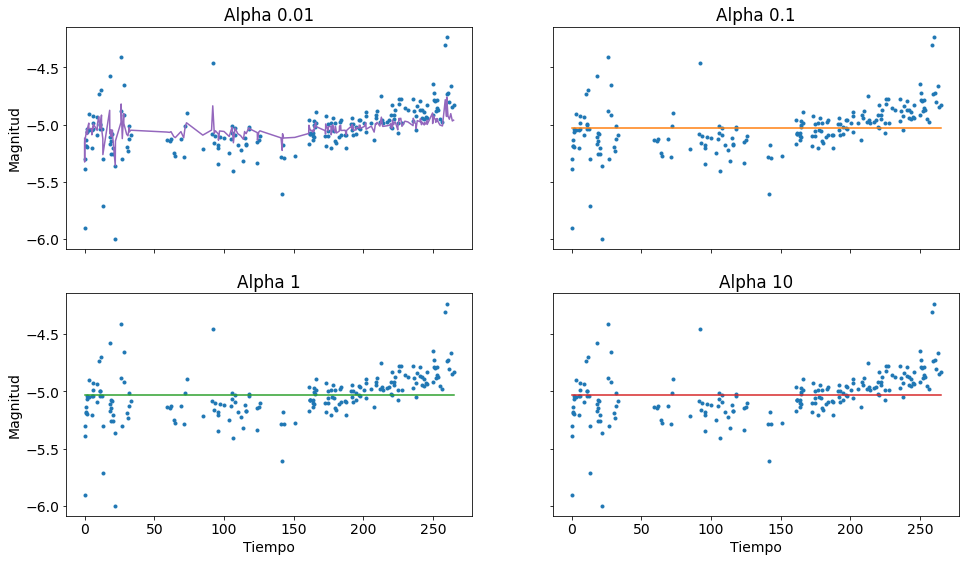

In [227]:
def lasso(data, alpha):
  ridgereg = Lasso(alpha=alpha, normalize=True)
  ridgereg.fit(data, data['magnitud'])
  return ridgereg.predict(data)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(data['tiempo'], data['magnitud'], '.')
axs[0, 0].plot(data['tiempo'], lasso(data, 0.01), 'tab:purple')
axs[0, 0].set_title('Alpha 0.01')
axs[0, 1].plot(data['tiempo'], data['magnitud'], '.')
axs[0, 1].plot(data['tiempo'], lasso(data, 0.1), 'tab:orange')
axs[0, 1].set_title('Alpha 0.1')
axs[1, 0].plot(data['tiempo'], data['magnitud'], '.')
axs[1, 0].plot(data['tiempo'], lasso(data, 1), 'tab:green')
axs[1, 0].set_title('Alpha 1')
axs[1, 1].plot(data['tiempo'], data['magnitud'], '.')
axs[1, 1].plot(data['tiempo'], lasso(data, 10), 'tab:red')
axs[1, 1].set_title('Alpha 10')
for ax in axs.flat:
    ax.set(xlabel='Tiempo', ylabel='Magnitud')
for ax in axs.flat:
    ax.label_outer()

Se puede observar que en ambos tipos de regresiones que a medida que se aumenta el factor de penalización, el modelo, se va simplificando cada vez más. Al punto de convertirse practicamente en una regresion lineal simple.

### Clasificación de Estrellas Variables
- Cargue la base de datos de estrellas variables `ts2.csv`. La columna *Class*
corresponde a la clase de cada estrella variable y el resto de las columnas
corresponden sus descriptores.

In [202]:
estrellas_data = pd.read_csv('ts2.csv')
estrellas_data.head()

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,lpv,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,lpv,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,ecl,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,lpv,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,lpv,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


- Genere un análisis descriptivo de ella y aplique las técnicas de procesamiento que sean necesarias. 
  - Podemos obsevar que la clase se encuentra en la columna *Class*
  - Se observa mediante el método `info()` que todas las columnas poseen un tipo de dato númerico, por lo que, no es necesario realizar transformaciones y/o correcciones adicionales.

In [203]:
estrellas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Class             5000 non-null   object 
 1   Amplitude         5000 non-null   float64
 2   AndersonDarling   5000 non-null   float64
 3   Autocor_length    5000 non-null   int64  
 4   Beyond1Std        5000 non-null   float64
 5   Gskew             5000 non-null   float64
 6   LinearTrend       5000 non-null   float64
 7   MaxSlope          5000 non-null   float64
 8   Mean              5000 non-null   float64
 9   Meanvariance      5000 non-null   float64
 10  MedianAbsDev      5000 non-null   float64
 11  MedianBRP         5000 non-null   float64
 12  PercentAmplitude  5000 non-null   float64
 13  PeriodLS          5000 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 547.0+ KB


Mediante el método `value_counts()` podemos saber la cantidad de clases que este dataset posee, para este caso, 6 diferentes

In [204]:
print(estrellas_data['Class'].value_counts())

lpv       3775
rrlyr      506
ecl        484
cep        107
NonVar      82
dsct        32
t2cep       11
acep         2
dpv          1
Name: Class, dtype: int64


Procederemos a transformar a valores numéricos la columna de las clases y posterirmente a realizar la separación de los datos

In [205]:
estrellas_target = estrellas_data['Class']
label_enc = LabelEncoder()
estrellas_target = label_enc.fit_transform(estrellas_target)
print(f'Clases Transformadas (Total: {len(estrellas_target)}): ', estrellas_target)
estrellas_descriptors = estrellas_data.loc[:,estrellas_data.columns != 'Class']
X_train, X_test, Y_train, Y_test = train_test_split(estrellas_descriptors, estrellas_target, test_size=0.4, random_state=0)

Clases Transformadas (Total: 5000):  [6 6 5 ... 6 6 6]


- Aplique 2 clasificadores de los vistos en el curso. Por cada uno de ellos,
estudie el efecto que tienen los hiperparámetros sobre la predicción en el
conjunto de entrenamiento y de testeo. Comente el efecto de cada
parámetro.
  - Clasificador 1 - Random Forest
  - Clasificador 2 - Decision Tree
  - Clasificador 3 - KNN

#### Random Forest

In [206]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, Y_train)

RandomForestClassifier()

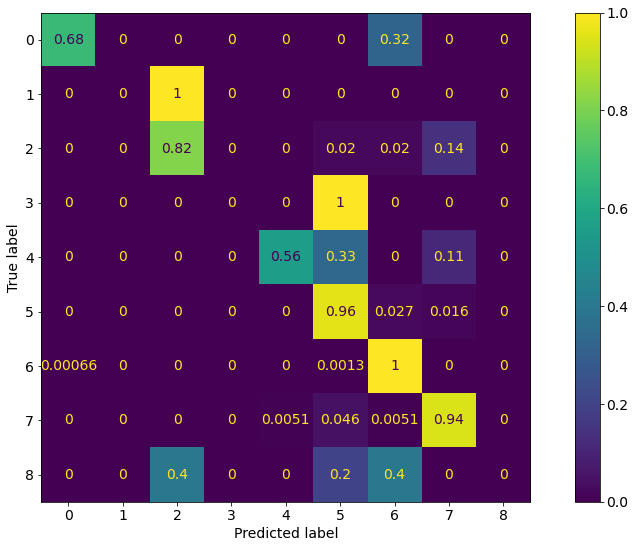

In [225]:
pred_rf = classifier_rf.predict(X_test)
plot_rf = ConfusionMatrixDisplay.from_predictions(Y_test, pred_rf, normalize='true')
plt.show()

#### Desicion Tree

In [208]:
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

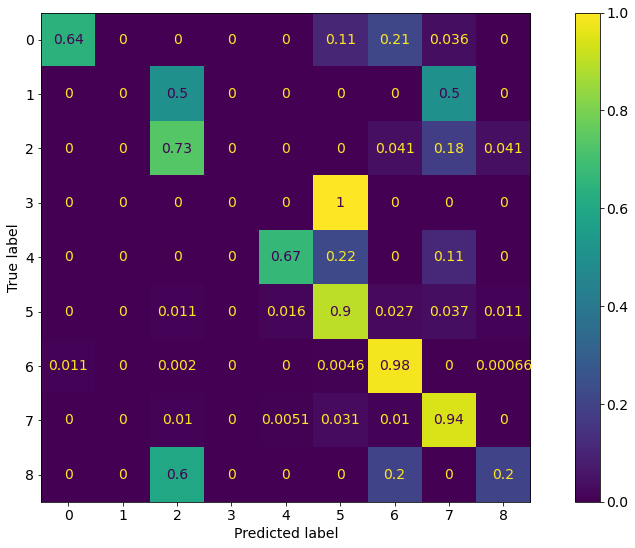

In [224]:
pred_dt = classifier_dt.predict(X_test)
plot_dt = ConfusionMatrixDisplay.from_predictions(Y_test, pred_dt, normalize='true')
plt.show()

#### KNN
Para determinar el valor óptimo K se utilizara el metodo [score()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score) en un rango de [1,30] intentos, al visualizar y graficar los resultados podemos ver que a medida que aumentamos K el *Accuracy* disminuye. El mejor resultado se obtiene con un K = 1

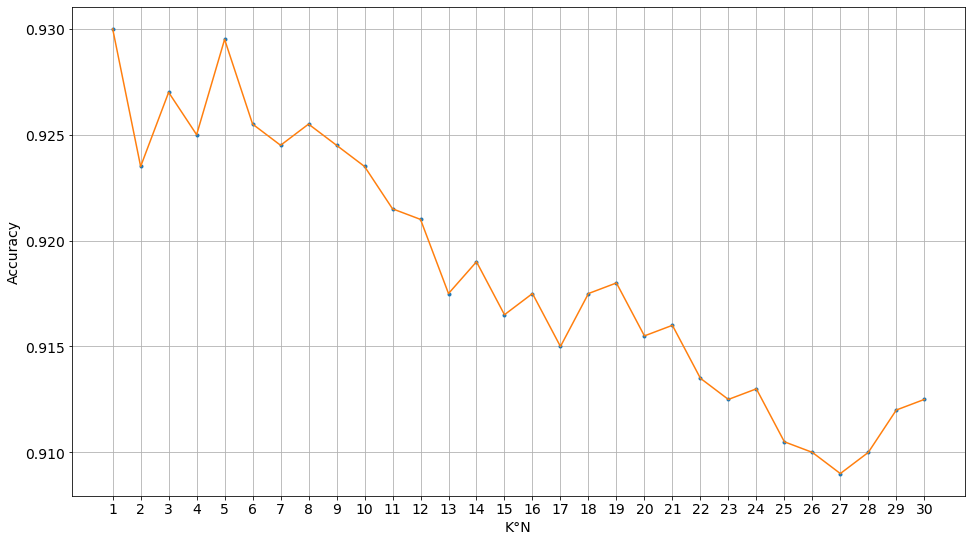

In [226]:
k_range = range(1, 31)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, Y_train)
  scores.append(knn.score(X_test, Y_test))
plt.xticks([i for i in range(1,31)])
plt.xlabel('K°N')
plt.ylabel('Accuracy')
plt.plot(k_range, scores, '.')
plt.plot(k_range, scores, 'tab:orange')
plt.grid()

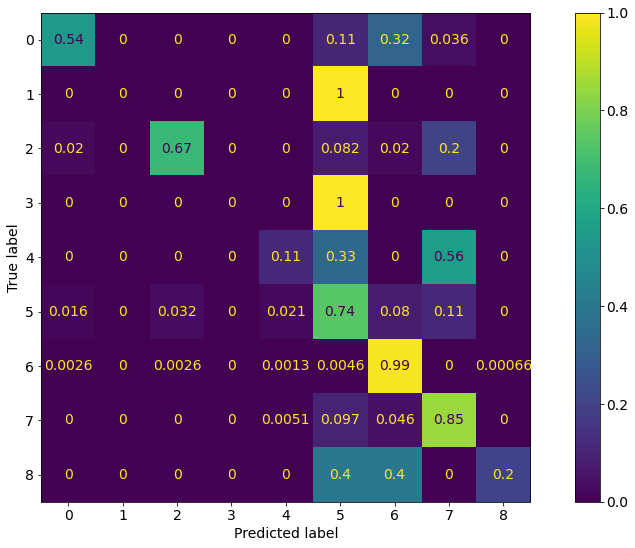

In [223]:
n_neighbors = scores.index(max(scores))+1
classifier_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
classifier_knn.fit(X_train, Y_train)
pred_knn = classifier_knn.predict(X_test)
plot_knn = ConfusionMatrixDisplay.from_predictions(Y_test, pred_knn, normalize='true')
plt.show()